# Лабораторная работа 6. Фильтры сглаживания

В данной лабораторной работе мы:
* узнаем, что такое фильтры сглаживания и для чего они нужны;
* реализуем собственные фильтры;
* оценим полученный результат.

## Задание 0 Заполнить данные в окне ниже
(для этого необходимо кликнуть два раза на текст ниже)

ФИО студентов: Лисовский Кирилл Алексеевич Никитенко Андрей Михайлович Уксусников Николай Алексеевич Савин Михаил Валерьевич Степаненко Дмитрий Владимирович (как пример, номер студ. билета 09106106)

Группа: РИМ-111060 Подгруппа задания: 3

## Подключить необходимые библиотеки

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy.fftpack import fft, ifft, fftshift
import scipy as sp

%matplotlib inline

## Теория
В предыдущих работах было изучено, что такое сигнал. Научились представлять сигнал в 4 видах. Изучили виды цифровых фильтров. В данной работе мы научимся выполнять оконные сглаживающие фильтрации. В работе рассмотрим два подхода:
* фильтр скользящего сглаживания;
* метод наименьших квадратов.

### Фильтр скользящего сглаживания

Одна из разновидностей цифрового фильтра с конечной импульсной характеристикой либо фильтра с бесконечной импульсной характеристикой (в случае экспоненциальной СС), использующегося для обработки сигналов и изображений, системах автоматического управления и для других прикладных целей.

Формула, описывающая простой фильтр: $t_j = \sum^{L}_{l=-L}c_ly_{j+l}$, $j = L+1,L+2,\ldots,N-L$, $c_l = \frac{1}{2L+1}$, $l = -L,\ldots,L$.

### Фильтр экпоненциального сглаживания

Разновидность взвешенной скользящей средней, веса которой убывают экспоненциально и никогда не равны нулю. Определяется следующей формулой: $\tau_j = (1-\alpha)\tau_{j-1}+\alpha y_j$, $j=1,2,\ldots,N$, 
$\alpha$ - коэффициент экспоненциального сглаживания между 0 и 1, а в качестве первой точки берется среднее значение ВР (или первых двух точек), 
$\tau$ - значение экспоненциального скользящего среднего в точках.

### Метод наименьших квадратов

Метод наименьших квадратов (МНК) - Математический метод, применяемый для решения различных задач, основанный на минимизации суммы квадратов отклонений некоторых функций от искомых переменных. Он может использоваться для «решения» переопределенных систем уравнений (когда количество уравнений превышает количество неизвестных), для поиска решения в случае обычных (не переопределенных) нелинейных систем уравнений, для аппроксимации точечных значений некоторой функции. МНК является одним из базовых методов регрессионного анализа для оценки неизвестных параметров регрессионных моделей по выборочным данным.




## Задание 1 Реализовать сигнал

### 1.1 Создайте функцию, возвращающую мгновенные значения сигнала 

$F = A \cdot sin(\omega \cdot t + \varphi_0)$,

где:

$A$ = вторая с конца цифра в номере студенческого (если это 0, то любая цифра до нее);

$t$ - отсчеты времени сигнала;

$\omega = 2 \cdot \pi \cdot N$

$\varphi_0 = \frac{2 \cdot \pi}{N}$

$N$ - последняя цифра в номере студенческого билета, если она ноль, то первая перед ней не равная 0

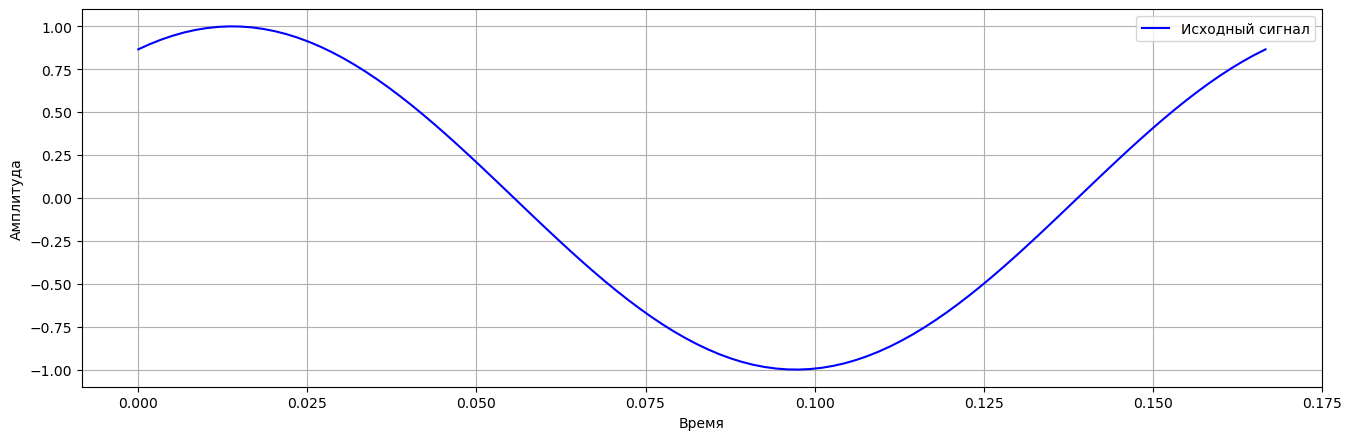

In [8]:
def mySignal(t,A=1,N=6):
    res = []
    for i in t:
        res.append(A*np.sin(2*np.pi*N*i+2*np.pi/N))
    return res

A = 1
N = 6

manyX = np.linspace(0,1/N,100)
manyY = mySignal(manyX,A,N)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(manyX,manyY,color = 'blue',label='Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### 1.2 Наложите шум на исходный сигнал

Наложите шум на сигнал, если $N // 2 == 0$, с равномерным законом распределения на интервале от $N \cdot [-0,1:0,1]$, иначе шум с нормальным законом распределения законом распределения у которого $\sigma = N$. 

In [9]:
def myNoise(t,A=1,N=6):
    res = []
    if (N//2) == 0:
        res = np.random.uniform((N+5) * -0.1, (N+5) * 0.1, len(t))
    else:
        res = np.random.normal(0, N, len(t))
    return res        
        

# дописать
t = np.linspace(0,2,100)
signal = mySignal(t,A,N)
noise = myNoise(t,A,N)
#signal_noise = mySignal(t,A,N) + myNoise(t,A,N)
signal_noise = signal + noise

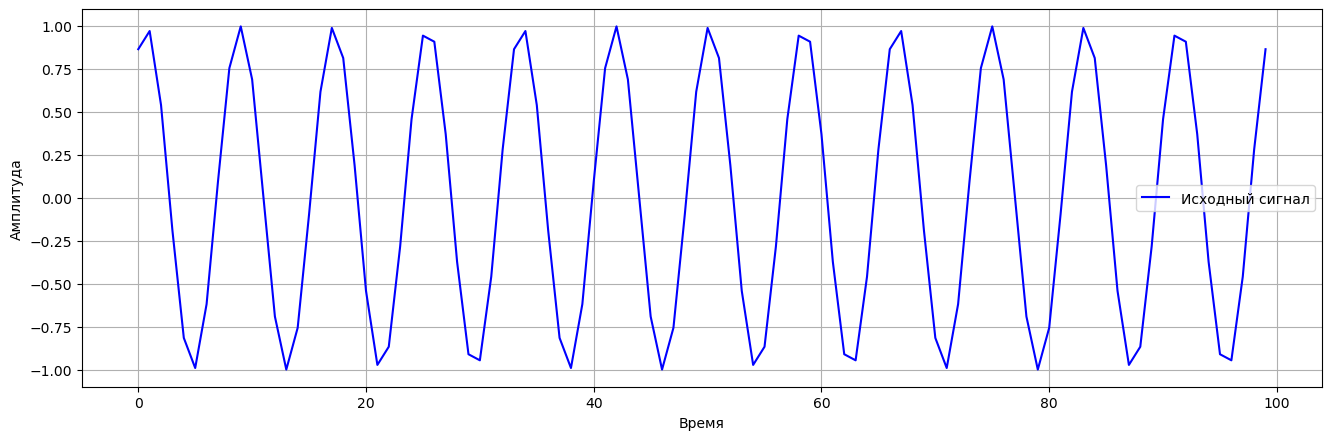

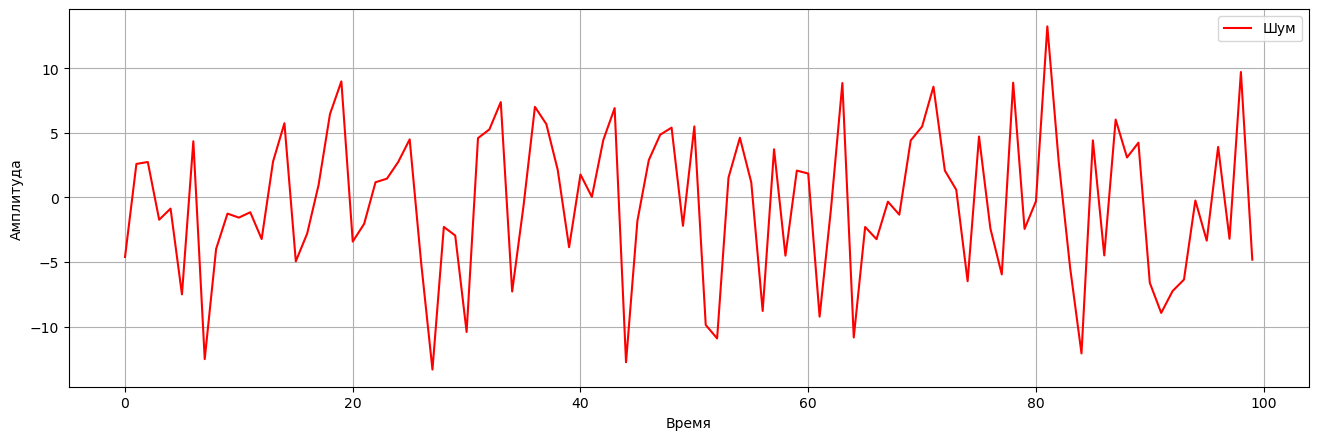

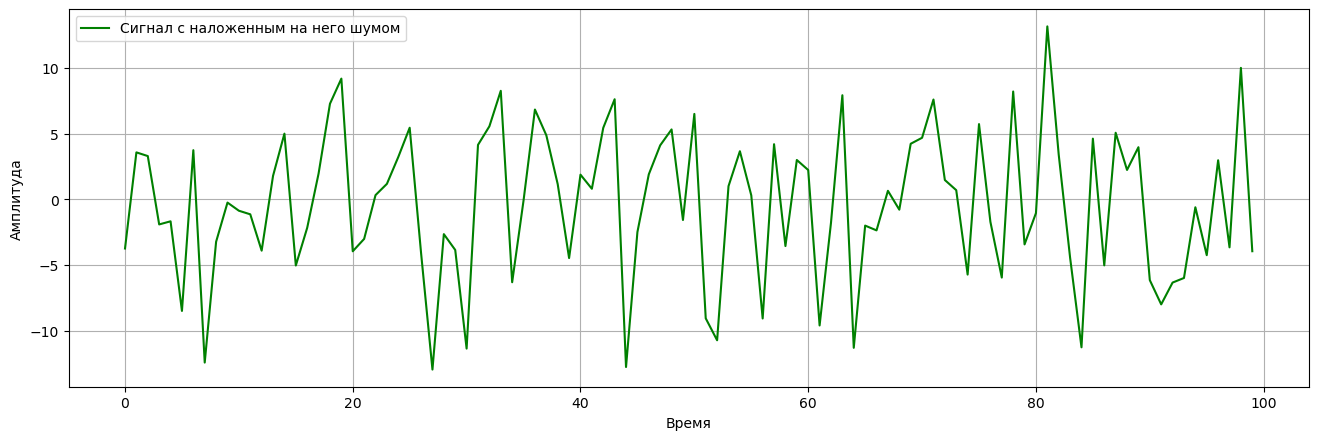

In [10]:
# Постройте исходный сигнал
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(signal,color = 'blue',label='Исходный сигнал')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

# Постройте шум
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(noise,color = 'red',label='Шум')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

# Постройте сигнал с наложенным на него шумом
fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(signal_noise,color = 'green',label='Cигнал с наложенным на него шумом')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

## Задание 2 Реализовать фильтр скользящего сглаживания

### 2.1 Фильтр с окном размера 3

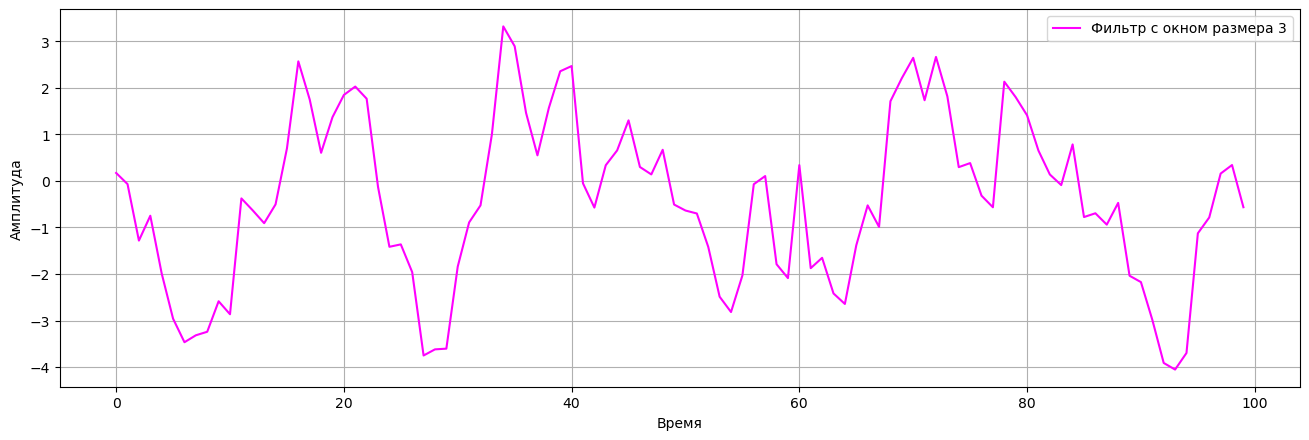

In [20]:
def smooth(Y, L=3):  
    # дописать 
    t = []
    c = 1 / (2*L+1)
    for j in range(len(Y)):
        summ = 0
        for l in range(-L,L+1):
            if (abs(l)+j <= len(Y)-1) and (j+l>=0):
                summ += c*Y[j+l]
        t.append(summ)
    return t

smooth3 = smooth(signal_noise)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(smooth3,color = 'magenta',label='Фильтр с окном размера 3')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### 2.2 Фильтр с окном размера 5

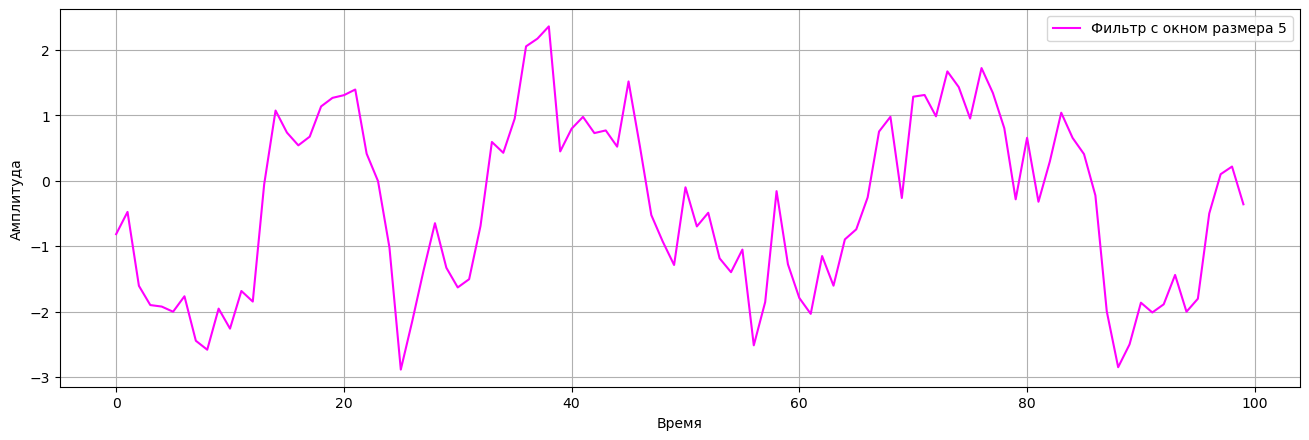

In [21]:
smooth5 = smooth(signal_noise, 5)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(smooth5,color = 'magenta',label='Фильтр с окном размера 5')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### 2.3 Фильтр с окном размера N

**Не забывайте, что $N$ должно проверятся на определенное условие. Если условие не выполняется, то можно использовать $N-1$ или $N+1$**

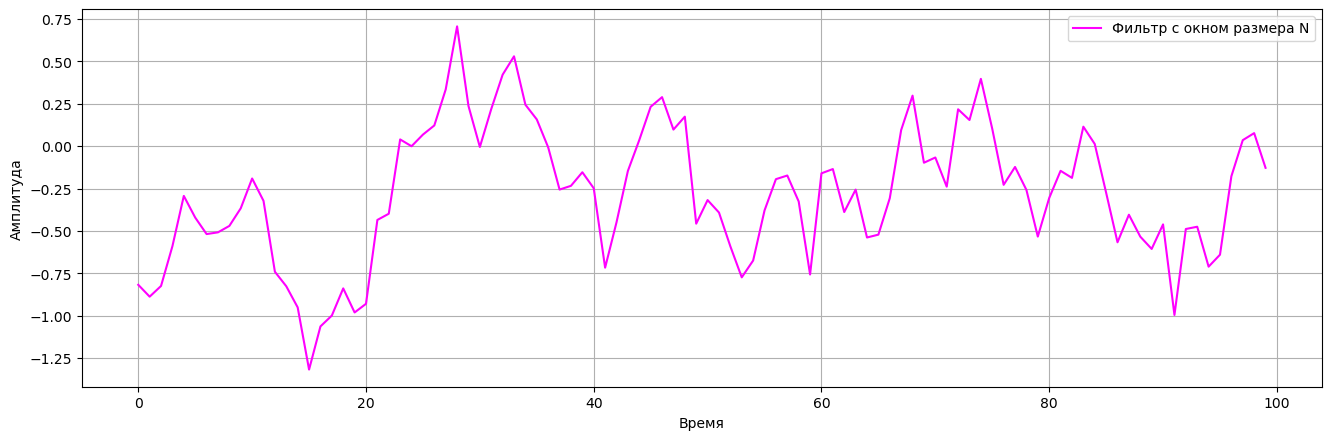

In [23]:
Nf = 15

smoothN = smooth(signal_noise, Nf)

fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(smoothN, color = 'magenta', label='Фильтр с окном размера N')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

## Задание 3 Применить фильтрацию к сигналу с шумом и сравнить результат визуально

В данном задании вам необходимо построить и проанализировать результат применения фильтрации к зашумленному сигналу.

На рисунке необходимо показать зашумленный сигнал, сигнал после фильтрации и сигнал до наложения шума.

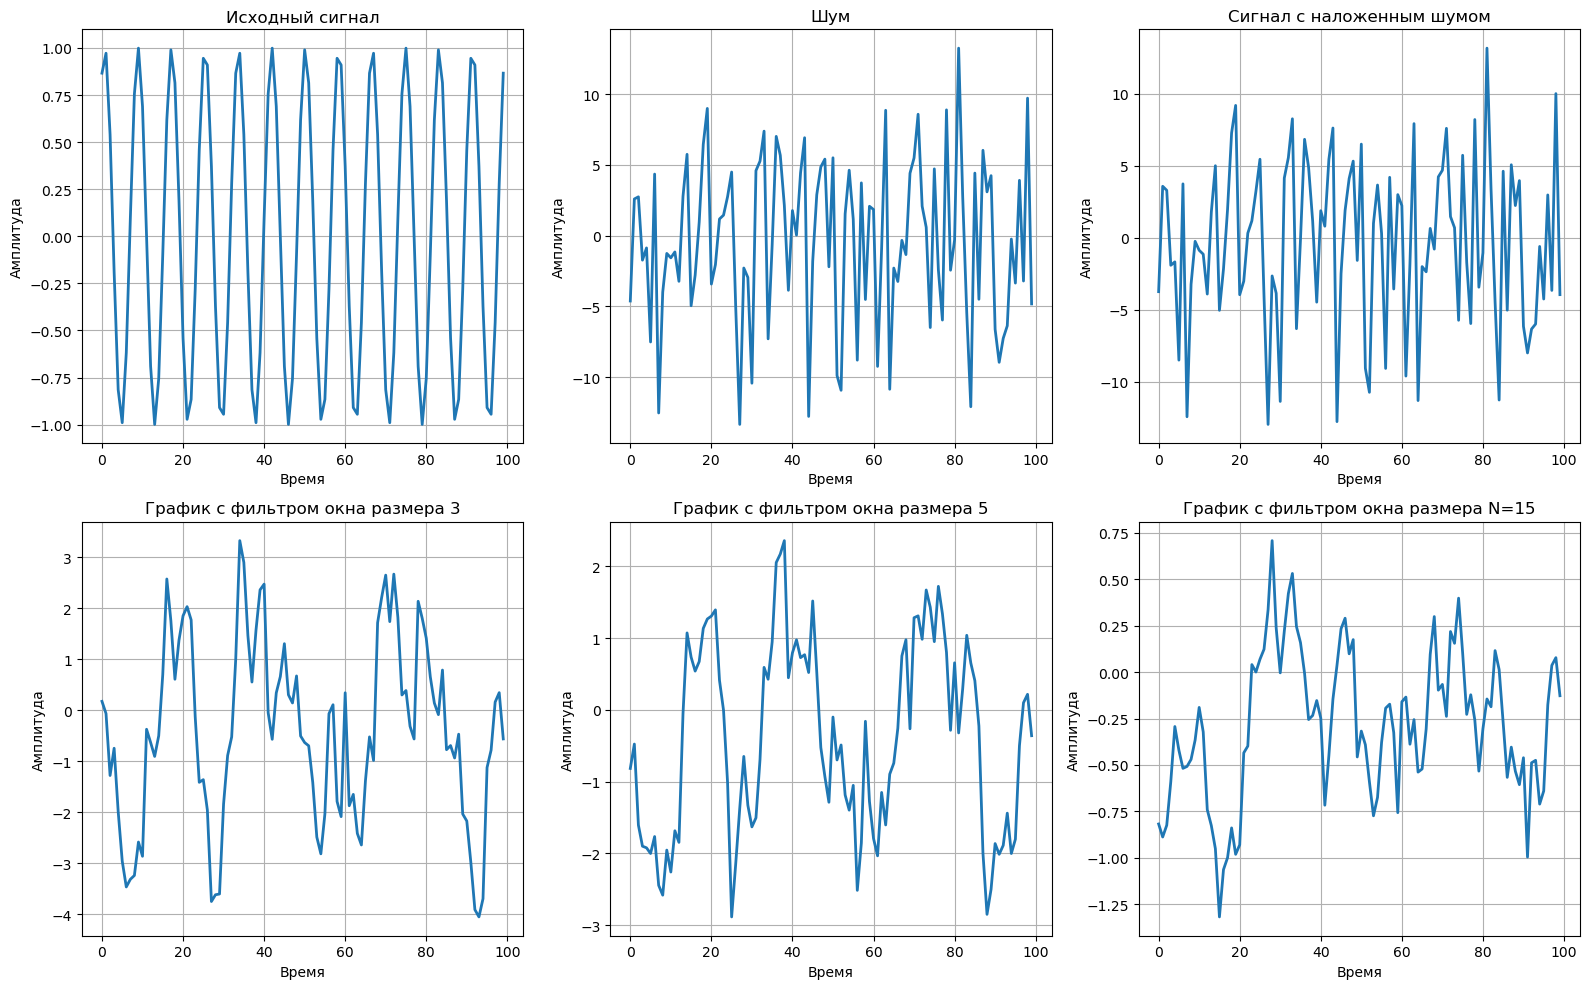

In [24]:
# код
fig = plt.figure(figsize=(16, 10), dpi=100)
    
plt.subplot(2, 3, 1)
plt.title("Исходный сигнал")
plt.plot(signal, linewidth=2.0)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 2)
plt.title("Шум")
plt.plot(noise, linewidth=2.0)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 3)
plt.title("Сигнал с наложенным шумом")
plt.plot(signal_noise, linewidth=2.0)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 4)
plt.title("График с фильтром окна размера 3")
plt.plot(smooth3, linewidth=2.0)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 5)
plt.title("График с фильтром окна размера 5")
plt.plot(smooth5, linewidth=2.0)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 6)
plt.title("График с фильтром окна размера N=15")
plt.plot(smoothN, linewidth=2.0)
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()


## Задание 4 Оценить полуенный результат математическим выражением

Для оценки качестав фильтраци необходимо:
* Вычислить разность фильтрованного сигнала $\hat{Y}$ и сигнала до наложения шума $Y$ для каждой точки.
* Вычислить выражение $\frac{1}{N}\sum^{N}_{i=1}(Y_i - \hat{Y}_i)^2$

In [25]:
# код вычислений функции из ЛР5, для примера и помощи
def getStatus(Y1,Y2):
    N = len(Y1)
    summ = 0
    for i in range(N):
        summ += (Y2[i] - Y1[i])**2
    summ = summ / N
    return summ

diff_in_points_noised = []
diff_in_points_sm3 = []
diff_in_points_sm5 = []
diff_in_points_smN = []

print("Разность в каждой точке для КИХ:")
for i in range(len(signal)):
    print("Точка ",i, " - ",signal[i] - signal_noise[i])
    diff_in_points_noised.append(signal[i] - signal_noise[i])

print()

print("Разность в каждой точке для БИХ:")
for i in range(len(signal)):
    print("Точка ",i, " - ",signal[i] - smooth3[i])
    diff_in_points_sm3.append(signal[i] - smooth3[i])
    
print("Разность в каждой точке для КИХ:")
for i in range(len(signal)):
    print("Точка ",i, " - ",signal[i] - smooth5[i])
    diff_in_points_sm5.append(signal[i] - smooth5[i])

print()

print("Разность в каждой точке для БИХ:")
for i in range(len(signal)):
    print("Точка ",i, " - ",signal[i] - smoothN[i])
    diff_in_points_smN.append(signal[i] - smoothN[i])
    
print()


print("Отклонение фильтрованного сигнала - ", getStatus(signal,signal_noise))
print("Отклонение с фильтром окна размера 3 - ",getStatus(signal,smooth3))
print("Отклонение с фильтром окна размера 5 - ",getStatus(signal,smooth5))
print("Отклонение с фильтром окна размера N - ",getStatus(signal,smoothN))

Разность в каждой точке для КИХ:
Точка  0  -  4.6118860537277975
Точка  1  -  -2.5987590485767784
Точка  2  -  -2.7494653361979067
Точка  3  -  1.7242715672934557
Точка  4  -  0.8615961240006519
Точка  5  -  7.5083618740237075
Точка  6  -  -4.355953214535366
Точка  7  -  12.524720842665115
Точка  8  -  3.9880212667927255
Точка  9  -  1.250306001728702
Точка  10  -  1.5608201649215072
Точка  11  -  1.1445025782841711
Точка  12  -  3.2209642047728755
Точка  13  -  -2.7823110286416517
Точка  14  -  -5.752813460173741
Точка  15  -  4.945962931833645
Точка  16  -  2.787035669739994
Точка  17  -  -0.9696751627257063
Точка  18  -  -6.4581141295453826
Точка  19  -  -8.996428248904309
Точка  20  -  3.4167242565897915
Точка  21  -  2.0449883469631196
Точка  22  -  -1.182350608258118
Точка  23  -  -1.4559746605109867
Точка  24  -  -2.762757326073215
Точка  25  -  -4.5019408138097035
Точка  26  -  4.99839396417565
Точка  27  -  13.333222576680075
Точка  28  -  2.2817933086113835
Точка  29  -  2.94

### 4.1 Оцените спектры сигналов до и после фильтрации

In [26]:
def Evaluate(x,v = "Imag"):
    newX = []
    for i in x:
        if v == "Imag":
            newX.append(i.real)
        elif v == "Real":
            newX.append(i.imag) 
        else:
            return 1
    return newX

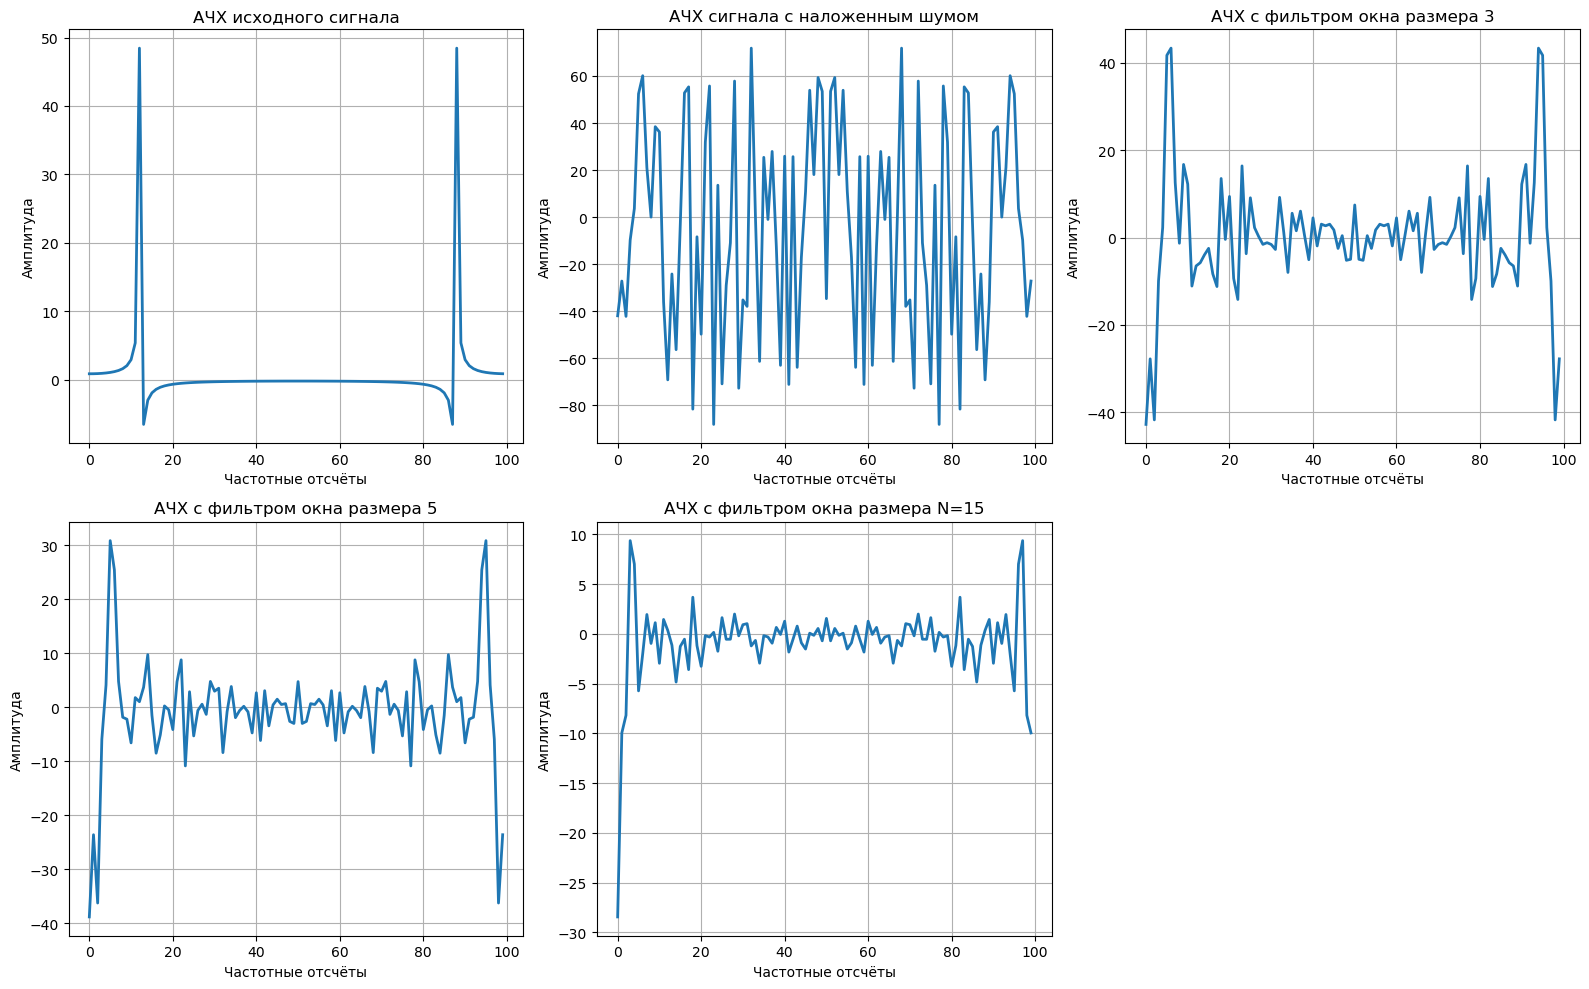

In [28]:
# код
fig = plt.figure(figsize=(16, 10), dpi=100)
    
plt.subplot(2, 3, 1)
plt.title("АЧХ исходного сигнала")
plt.plot(Evaluate(fft(signal),"Imag"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 2)
plt.title("АЧХ сигнала с наложенным шумом")
plt.plot(Evaluate(fft(noise),"Imag"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 3)
plt.title("АЧХ с фильтром окна размера 3")
plt.plot(Evaluate(fft(smooth3),"Imag"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 4)
plt.title("АЧХ с фильтром окна размера 5")
plt.plot(Evaluate(fft(smooth5),"Imag"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 5)
plt.title("АЧХ с фильтром окна размера N=15")
plt.plot(Evaluate(fft(smoothN),"Imag"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()


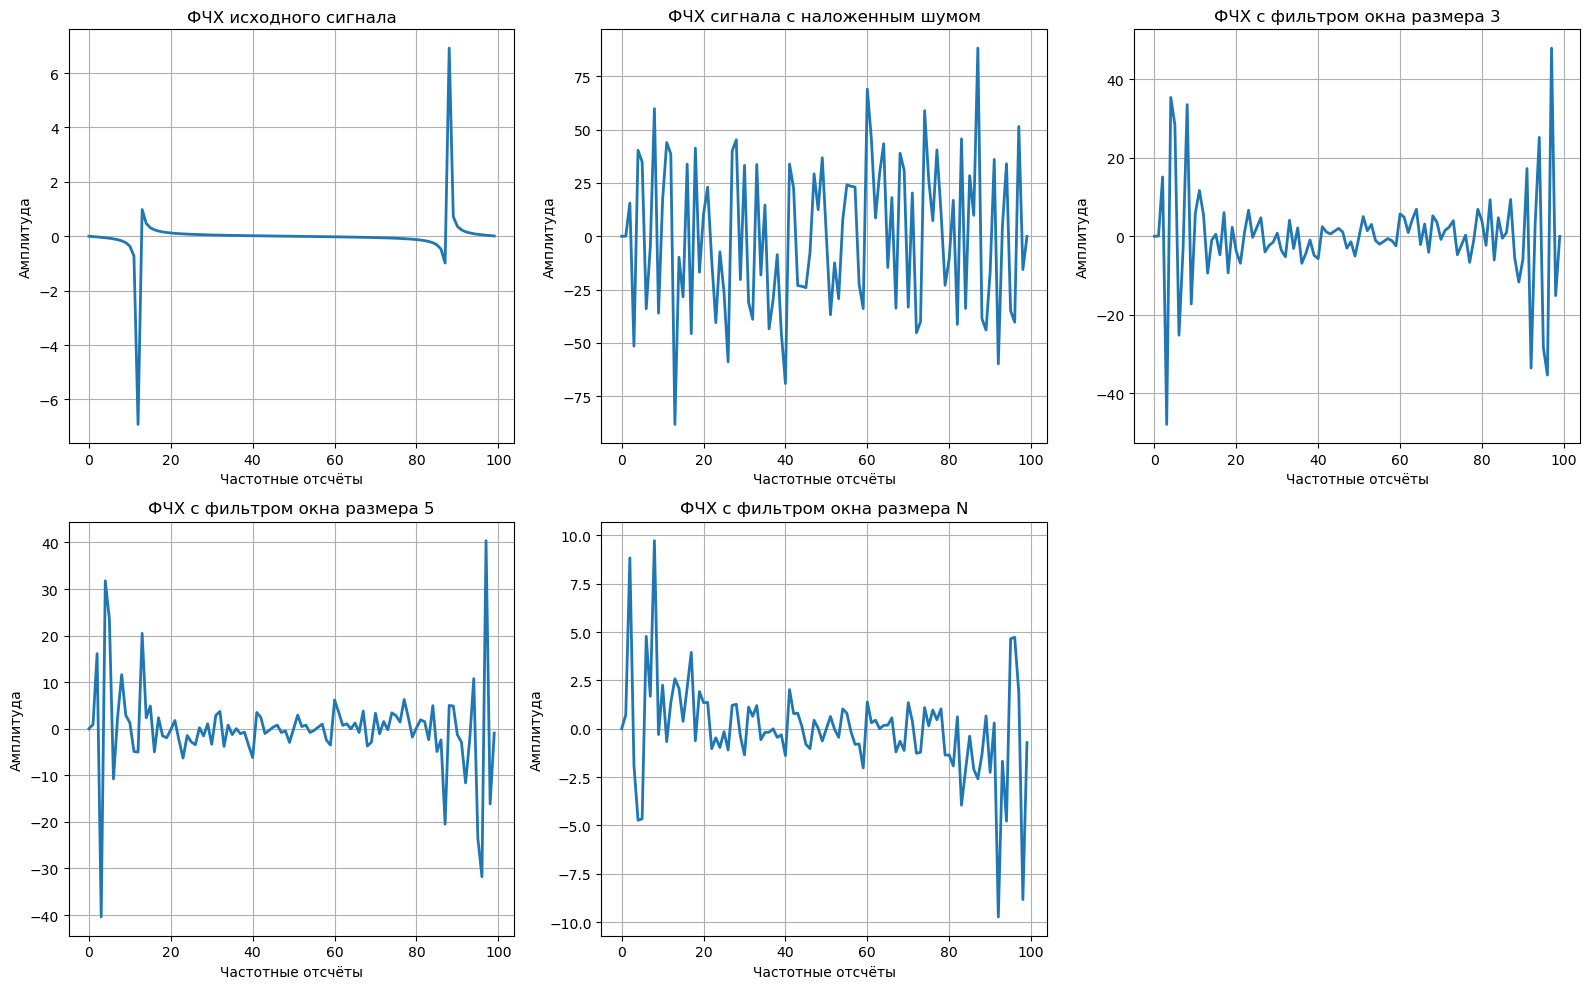

In [30]:
# код
fig = plt.figure(figsize=(16, 10), dpi=100)
    
plt.subplot(2, 3, 1)
plt.title("ФЧХ исходного сигнала")
plt.plot(Evaluate(fft(signal),"Real"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 2)
plt.title("ФЧХ сигнала с наложенным шумом")
plt.plot(Evaluate(fft(noise),"Real"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 3)
plt.title("ФЧХ с фильтром окна размера 3")
plt.plot(Evaluate(fft(smooth3),"Real"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 4)
plt.title("ФЧХ с фильтром окна размера 5")
plt.plot(Evaluate(fft(smooth5),"Real"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

plt.subplot(2, 3, 5)
plt.title("ФЧХ с фильтром окна размера N")
plt.plot(Evaluate(fft(smoothN),"Real"), linewidth=2.0)
plt.xlabel('Частотные отсчёты')
plt.ylabel('Амплитуда')
plt.grid()
plt.tight_layout()

### Что получилось? Какие выводы можно сделать?
(для ответа кликнуть два раза на окно ниже)

Из графиков видно, что, чем больше мы используем отсчётов нашего фильтра (а количество отсчётов – это порядок цифрового фильтра), тем более его характеристика становится похожа на идеальную.

Таким образом, чем выше порядок фильтра - тем лучше проявляется эффект сглаживания. АЧХ меняется после фильтрации, амплитуда становится зависимой в большей степени от частоты. ФЧХ с наложенным шумом и оконным фильтром меняется незначительно.

## Задание 5 Оценка шума и качества фильтрации

Сравните дисперсию шума на выходе цифрового фильтра, осуществляющего скользящее сглаживание, с дисперсией входного сигнала.


Разность фильтрованного сигнала (скользящего, с фильтром окна размера 3) и сигнала до наложения шума:
В точке 0  : -0.6944120739334958
В точке 1  : -1.0396513921941686
В точке 2  : -1.8225068293126014
В точке 3  : -0.558644163451628
В точке 4  : -1.173862905678499
В точке 5  : -1.9704520314677283
В точке 6  : -2.848049460870798
В точке 7  : -3.412295682079234
В точке 8  : -3.9970364277340504
В точке 9  : -3.584848464041421
В точке 10  : -3.5552530704628267
В точке 11  : -0.3756413896692256
В точке 12  : 0.05604515285583378
В точке 13  : 0.09091376327477341
В точке 14  : 0.2521156781668846
В точке 15  : 0.793878241385365
В точке 16  : 1.95162359893482
В точке 17  : 0.7598456056310596
В точке 18  : -0.20974659041064858
В точке 19  : 1.1809130000809214
В точке 20  : 2.3883934600667796
В точке 21  : 2.9997766742481478
В точке 22  : 2.6331693026988523
В точке 23  : 0.1525276754578641
В точке 24  : -1.8737449812501672
В точке 25  : -2.3086129709495764
В точке 26  : -2.8695359366438544
В точк

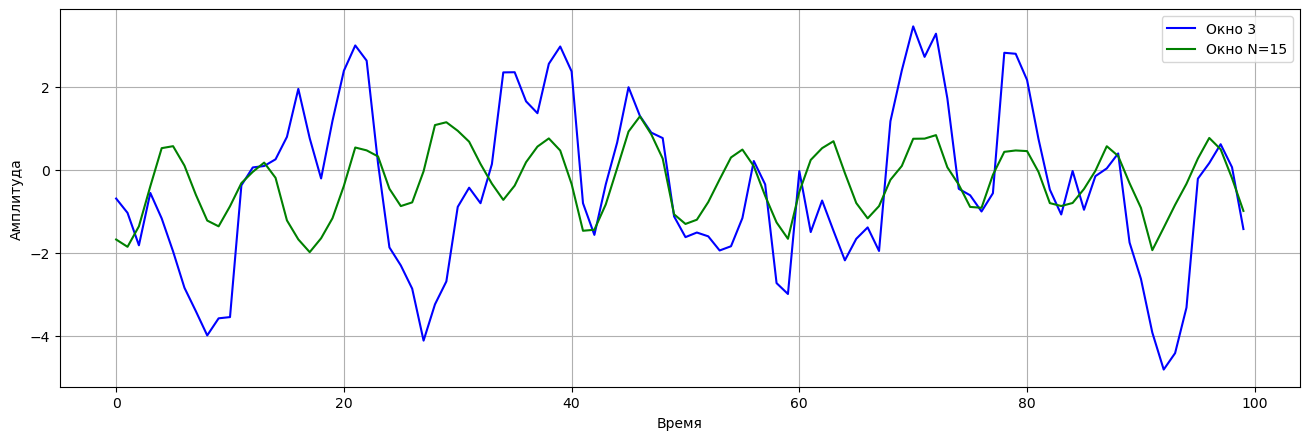

In [29]:
# код
smoothD = smooth(signal_noise,10)

NSignal = len(signal)

# код
print("Разность фильтрованного сигнала (скользящего, с фильтром окна размера 3) и сигнала до наложения шума:")
dis1 = 0
dis1_arr = []
for i in range(NSignal):
    dis1 += (smooth3[i] - signal[i])**2
    dis1_arr.append(smooth3[i] - signal[i])
    print("В точке", i," :",smooth3[i] - signal[i])

print("Разность фильтрованного сигнала (скользящего, с фильтром окна размера 5) и сигнала до наложения шума:")
dis2 = 0
for i in range(NSignal):
    dis2 += (smooth5[i] - signal[i])**2
    print("В точке", i," :",smooth5[i] - signal[i])
    
print("Разность фильтрованного сигнала (скользящего, с фильтром окна размера D) и сигнала до наложения шума:")
dis3 = 0
for i in range(NSignal):
    dis3 += (smoothD[i] - signal[i])**2
    print("В точке", i," :",smoothD[i] - signal[i])
    
print("Разность фильтрованного сигнала (скользящего, с фильтром окна размера N) и сигнала до наложения шума:")
dis4 = 0
dis4_arr = []
for i in range(NSignal):
    dis4 += (smoothN[i] - signal[i])**2
    dis4_arr.append(smoothN[i] - signal[i])
    print("В точке", i," :",smoothN[i] - signal[i])
    

dis5 = 0
for i in range(NSignal):
    dis5 += (signal_noise[i] - signal[i])**2
    print("В точке", i," :",smoothN[i] - signal[i])
    
print("Дисперсия фильтрованного сигнала (скользящего, с фильтром окна размера 3):",dis1/ NSignal)
print("Дисперсия фильтрованного сигнала (скользящего, с фильтром окна размера 5):",dis2/ NSignal)
print("Дисперсия фильтрованного сигнала (скользящего, с фильтром окна размера D):",dis3/ NSignal)
print("Дисперсия фильтрованного сигнала (скользящего, с фильтром окна размера N):",dis4/ NSignal)
print("Дисперсия входного сигнала:",dis5/NSignal)


fig = plt.figure(figsize=(16, 5), dpi=100)
plt.plot(dis1_arr,color = 'blue',label='Окно 3')
plt.plot(dis4_arr,color = 'green',label='Окно N=15')
plt.xlabel('Время')
plt.ylabel('Амплитуда')
plt.grid()
plt.legend()
plt.show()

### Объясните полученный результат

Чем больше ширина окна, тем дисперсия меньше. Фильтр с размером окна N=15 лучше.

## Какие из трех реализованных фильтров БИХ, а какие КИХ? Обоснуйте ответ.

1. Фильтр скользящего среднего - разновидность КИХ-фильтров (в некоторых случаях БИХ-фильтров). Отличительной особенностью фильтра скользящего среднего является равенство единице суммы коэффициентов.

2. По ходу выполнения работы - все БИХ фильтры. Если в получении нового значения сигнала участвуют его предыдущие отчеты, то в момент, когда сигнал перестает поступать на фильтр, на выходе сигнал все еще остается, но его амплитуда будет затухать. При подаче единичного импульса на выходе он превратится взатухающий сигнал.

3. Таким образом, значение выходного сигнала БИХ-фильтра зависит не только от текущего и предыдущего значения входного сигнала, но и от предыдущего значения выходного сигнала). Например, при программной реализации БИХ фильтра возникала необходимость использовать раннее полученные значения для расчета последующих.

## Выводы по работе

1. Реализованы различные фильтры, которые впоследствии были применены для очистки сигнала от шума.

2. Фильтр скользящего среднего сглаживал сигнал лучше при возрастании параметра L, но амплитуда сигнала начинала сильнее отклоняться от первоначального значения.

3. На ФЧХ исходного сигнала примененная фильтрация критически важного влияния не оказывала.

4. Из графиков видно, что, чем больше мы используем отсчётов нашего фильтра (а количество отсчётов – это порядок цифрового фильтра), тем более его характеристика становится похожа на идеальную.

5. Качественная фильтрация шума способна уменьшить погрешность и увеличить качество измерения.

*Спроектированный нами фильтр называется скользящее среднее:
В каждый момент времени берётся текущий отсчёт и N предыдущих, каждый из которых домножается на коэффициент, затем эти результаты складываются и полученная сумма поступает на выход. Процедура повторяется, пока весь сигнал не будет обработан.

*Импульсная характеристика фильтра — это выходная последовательность фильтра во временной области при подаче на вход фильтра дельта-функции (единственного отсчёта, равного единице (единичного импульса), которому предшествуют и за которым следуют нулевые отсчёты).